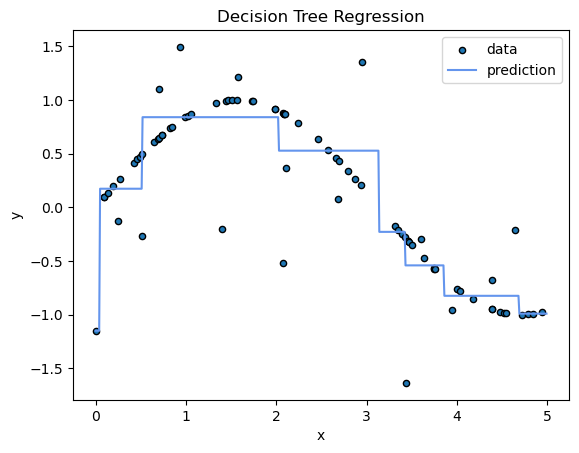

In [4]:

import matplotlib.pyplot as plt
# training a simple tree on a noisy sine curve.
import numpy as np
from sklearn.tree import DecisionTreeRegressor

# Generate sample data
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_pred = regressor.predict(X_test)

# Plot
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", label="data")
plt.plot(X_test, y_pred, color="cornflowerblue", label="prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


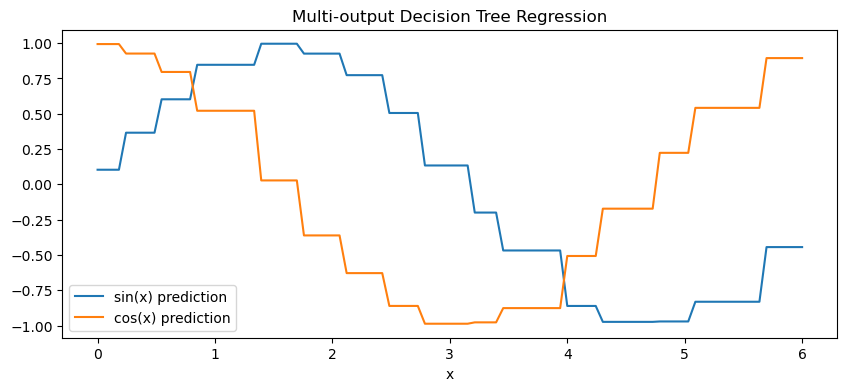

In [5]:
# multi-output regression tree
from sklearn.tree import DecisionTreeRegressor

# Input data: x values
X = np.sort(np.random.rand(100, 1) * 6, axis=0)

# Multi-output: y is both sin(x) and cos(x)
y = np.hstack((np.sin(X), np.cos(X)))  # shape: (100, 2)

# Fit a multi-output regressor
multi_reg = DecisionTreeRegressor(max_depth=4)
multi_reg.fit(X, y)

# Predict
X_test = np.linspace(0, 6, 100).reshape(-1, 1)
y_pred = multi_reg.predict(X_test)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(X_test, y_pred[:, 0], label='sin(x) prediction')
plt.plot(X_test, y_pred[:, 1], label='cos(x) prediction')
plt.xlabel("x")
plt.title("Multi-output Decision Tree Regression")
plt.legend()
plt.show()


In [7]:
# bagging decision trees
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators=10,
    max_samples=0.8,
    bootstrap=True,  # with replacement
    random_state=42
)

bag.fit(X_train, y_train)
print("Bagging Accuracy:", bag.score(X_test, y_test))


Bagging Accuracy: 1.0


In [17]:
# histboost and adaboost
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Load the wine dataset
X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for AdaBoost (HistGradientBoosting doesn't need it)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(max_iter=100, random_state=42)
hgb.fit(X_train, y_train)
print("HistGradientBoosting Accuracy:", round(hgb.score(X_test, y_test), 3))

X, y = load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# AdaBoostClassifier
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1.0,
    random_state=42
)
ada.fit(X_train_scaled, y_train)
print("AdaBoostClassifier Accuracy:", round(ada.score(X_test_scaled, y_test), 3))


HistGradientBoosting Accuracy: 0.972
AdaBoostClassifier Accuracy: 0.972


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset from UCI repo (or local CSV)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
    'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
    'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv(url, header=None, names=columns, na_values=' ?')

# Drop rows with missing values
df.dropna(inplace=True)

# Binary target
df['income'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

# Split data
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# Base models
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = SVC(probability=True)

# Ensemble with voting
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('svc', clf3)],
    voting='soft'
)

# Pipeline with preprocessing + voting model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

# Train
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"VotingClassifier Accuracy on Adult Dataset: {acc:.3f}")


VotingClassifier Accuracy on Adult Dataset: 0.861


In [19]:
# multiclass classification
from sklearn.datasets import load_wine
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

X, y = load_wine(return_X_y=True)
model = OneVsRestClassifier(LinearSVC(max_iter=5000)).fit(X, y)
print(model.score(X, y))


0.9887640449438202


In [20]:
# mutli-label classification
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

X, y = make_multilabel_classification(n_samples=100, n_classes=5, random_state=0)
model = MultiOutputClassifier(RandomForestClassifier()).fit(X, y)
print(model.predict(X[:5]))


[[0 0 1 1 1]
 [0 0 1 0 0]
 [1 1 0 1 0]
 [1 1 1 1 1]
 [1 1 1 0 0]]


In [21]:
# multiclass-multioutput classification
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np

X, y1 = make_classification(n_samples=100, n_classes=3, n_informative=10, random_state=0)
y2 = shuffle(y1, random_state=1)
y3 = shuffle(y1, random_state=2)
Y = np.vstack((y1, y2, y3)).T

model = MultiOutputClassifier(RandomForestClassifier()).fit(X, Y)
print(model.predict(X[:5]))


[[1 0 0]
 [1 1 1]
 [0 1 0]
 [0 1 1]
 [0 0 0]]


In [22]:
## multioutput regression
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_regression(n_samples=100, n_targets=3, noise=0.1, random_state=0)
model = MultiOutputRegressor(GradientBoostingRegressor()).fit(X, y)
print(model.predict(X[:5]))


[[ 103.46900384   58.47876611  139.79678649]
 [  44.372294     10.02245263  148.98701323]
 [ 158.87398025  302.19018425  139.30669366]
 [ 123.76768215  237.81428502  116.12659336]
 [-180.40874137  -56.45742281 -242.41033187]]


In [2]:
# using a nural network to solve the adult dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load Adult dataset
X, y = fetch_openml("adult", version=2, as_frame=True, return_X_y=True)
X = pd.get_dummies(X)  # One-hot encode categorical features
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), solver="adam", max_iter=300, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Evaluate
y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"MLPClassifier Accuracy on Adult dataset: {accuracy:.4f}")


MLPClassifier Accuracy on Adult dataset: 0.8370
